<a href="https://colab.research.google.com/github/Segn11/dataset-analysis-and-manipulation/blob/prediction/Exploratory_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
from google.colab import files
uploaded = files.upload()


Saving Train (1).csv to Train (1).csv


In [2]:
import pandas as pd

# Use the exact filename shown after upload
df = pd.read_csv('Train (1).csv')

# Show the first few rows
df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


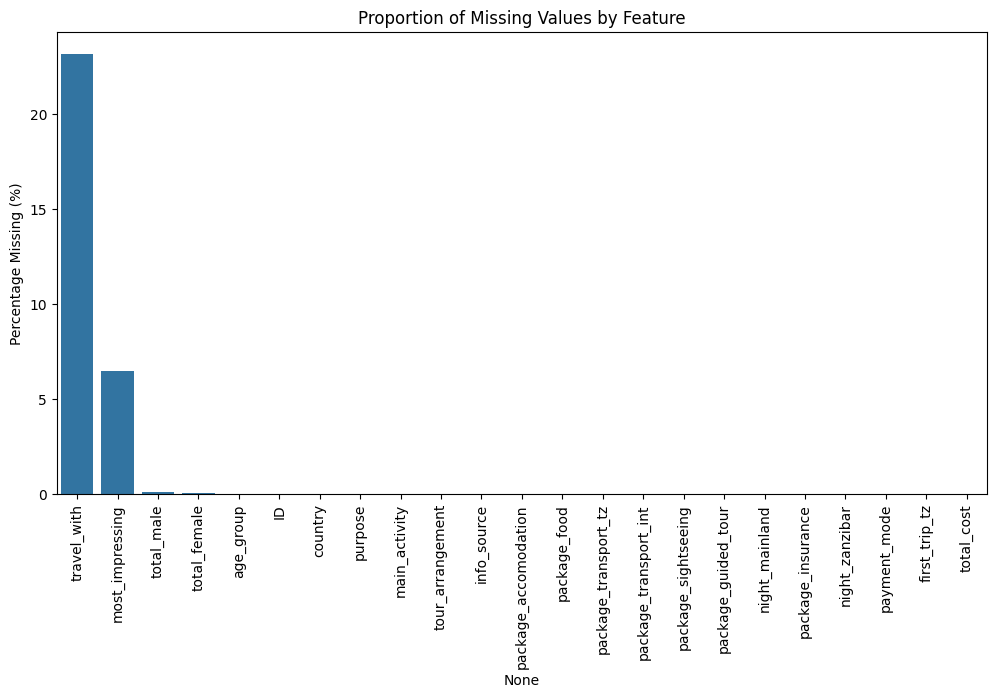

In [3]:
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("Train (1).csv")

# Calculate missing values
missing = df.isnull().mean().sort_values(ascending=False) * 100

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=missing.index, y=missing.values)
plt.xticks(rotation=90)
plt.title("Proportion of Missing Values by Feature")
plt.ylabel("Percentage Missing (%)")
plt.show()

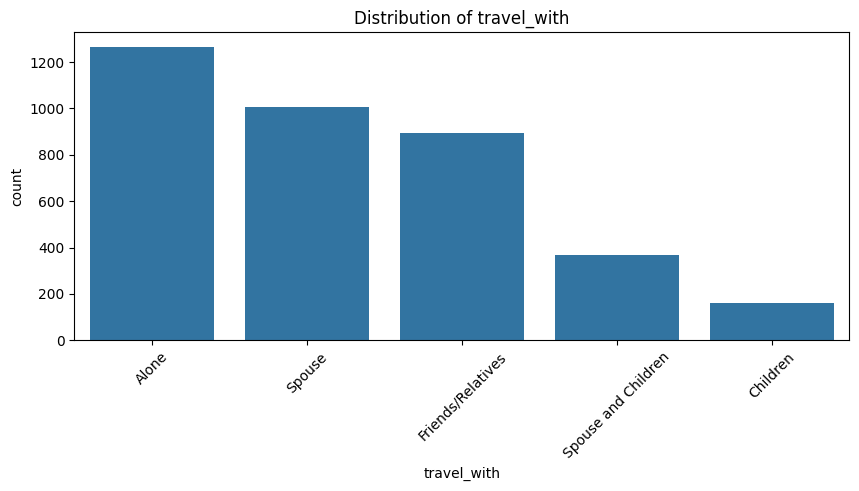

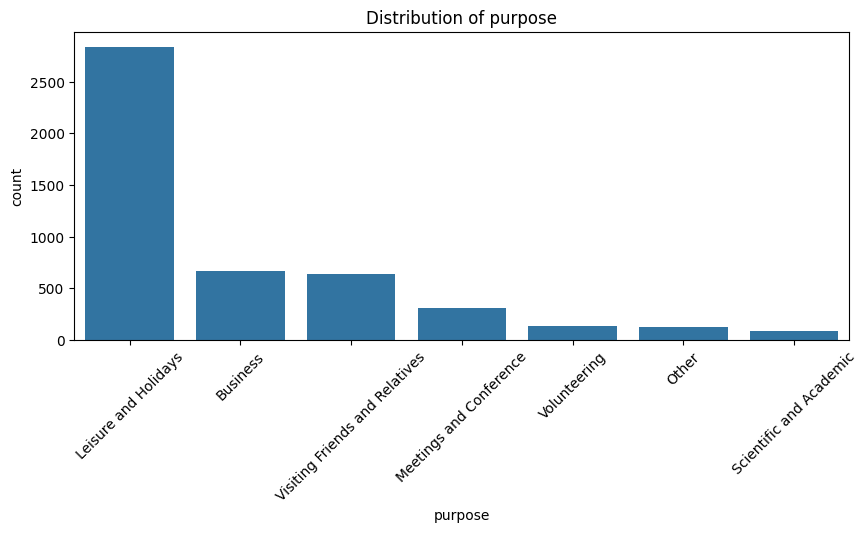

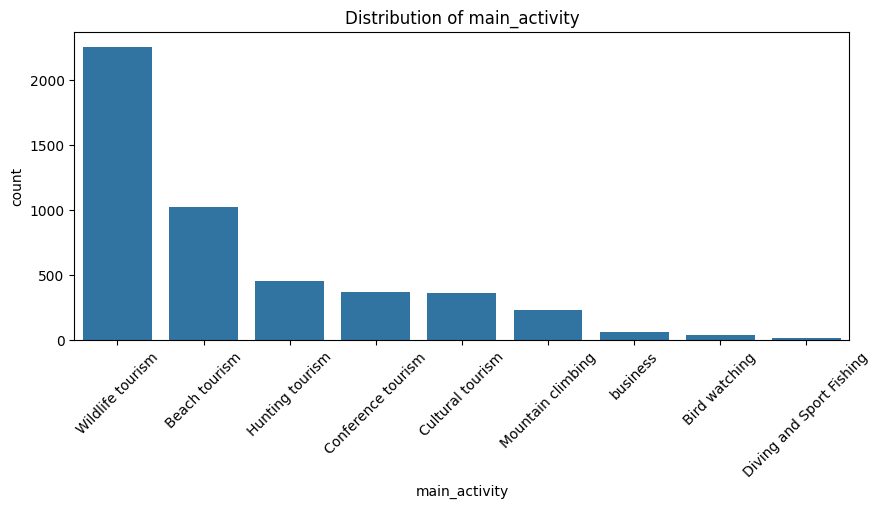

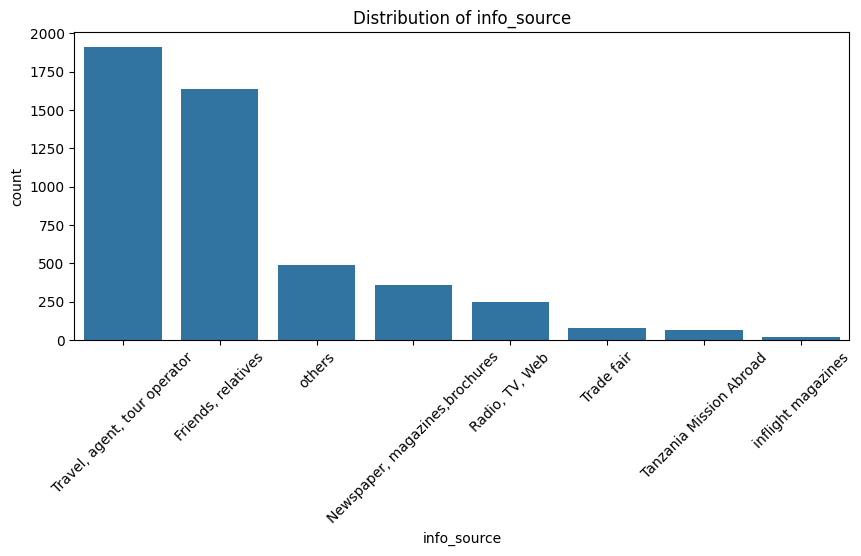

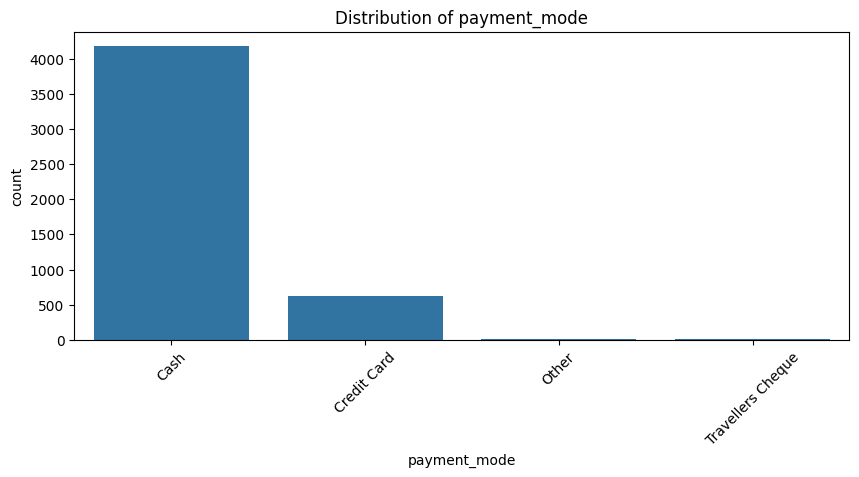

In [4]:
categorical_vars = ['travel_with', 'purpose', 'main_activity', 'info_source', 'payment_mode']

for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=var, order=df[var].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {var}")
    plt.show()

In [5]:
print(df[categorical_vars].describe(include='O'))

       travel_with               purpose     main_activity  \
count         3695                  4809              4809   
unique           5                     7                 9   
top          Alone  Leisure and Holidays  Wildlife tourism   
freq          1265                  2840              2259   

                         info_source payment_mode  
count                           4809         4809  
unique                             8            4  
top     Travel, agent, tour operator         Cash  
freq                            1913         4172  


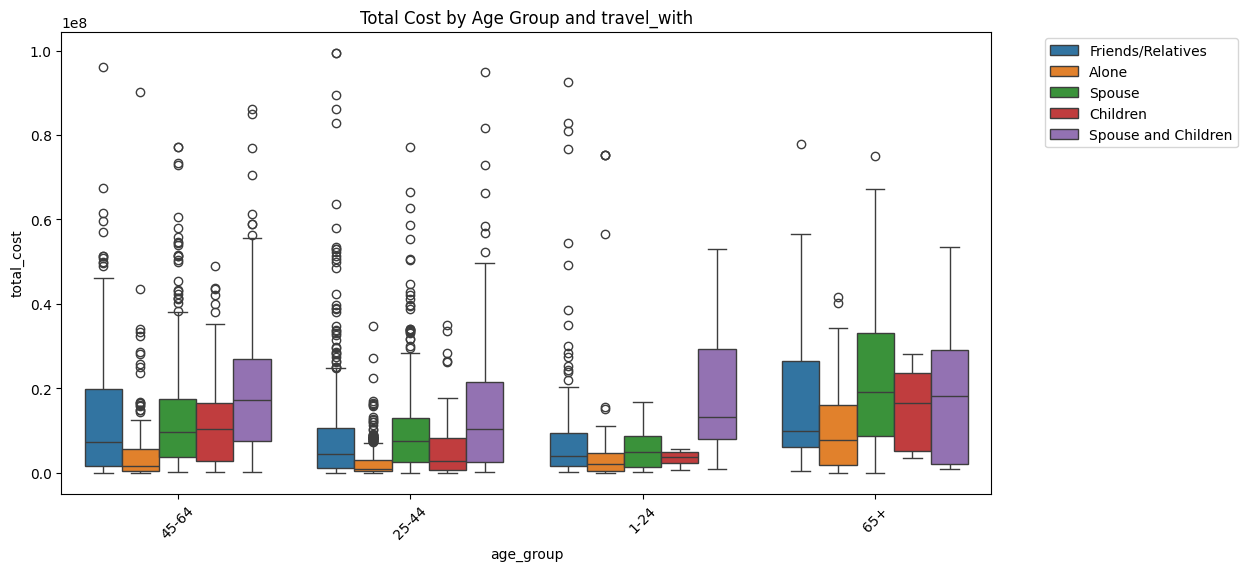

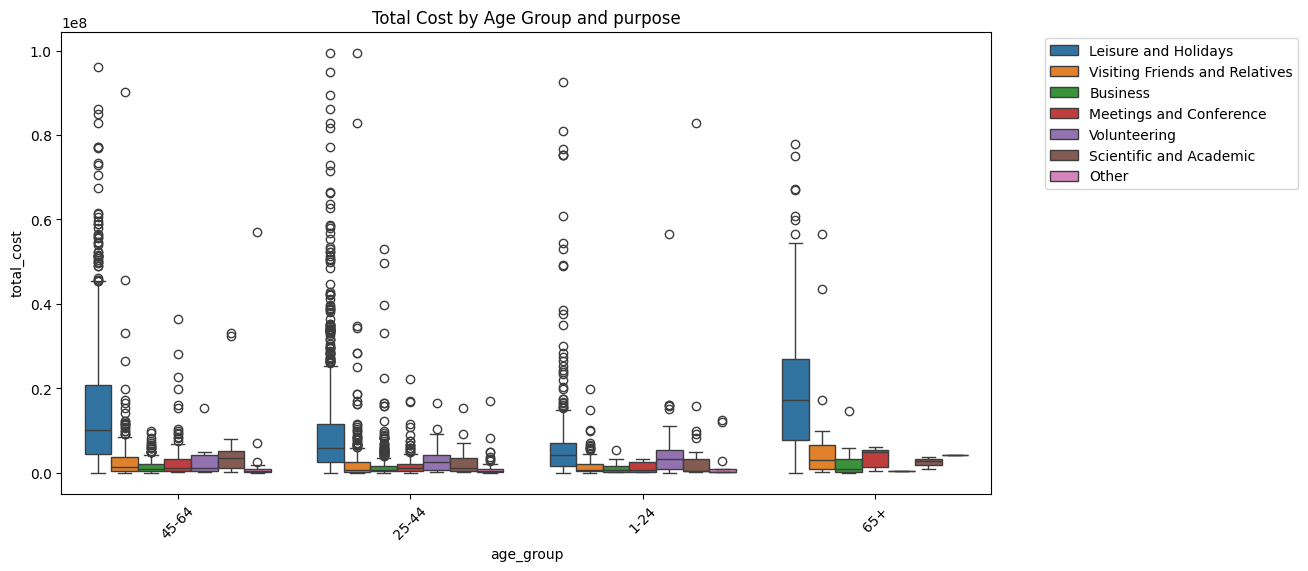

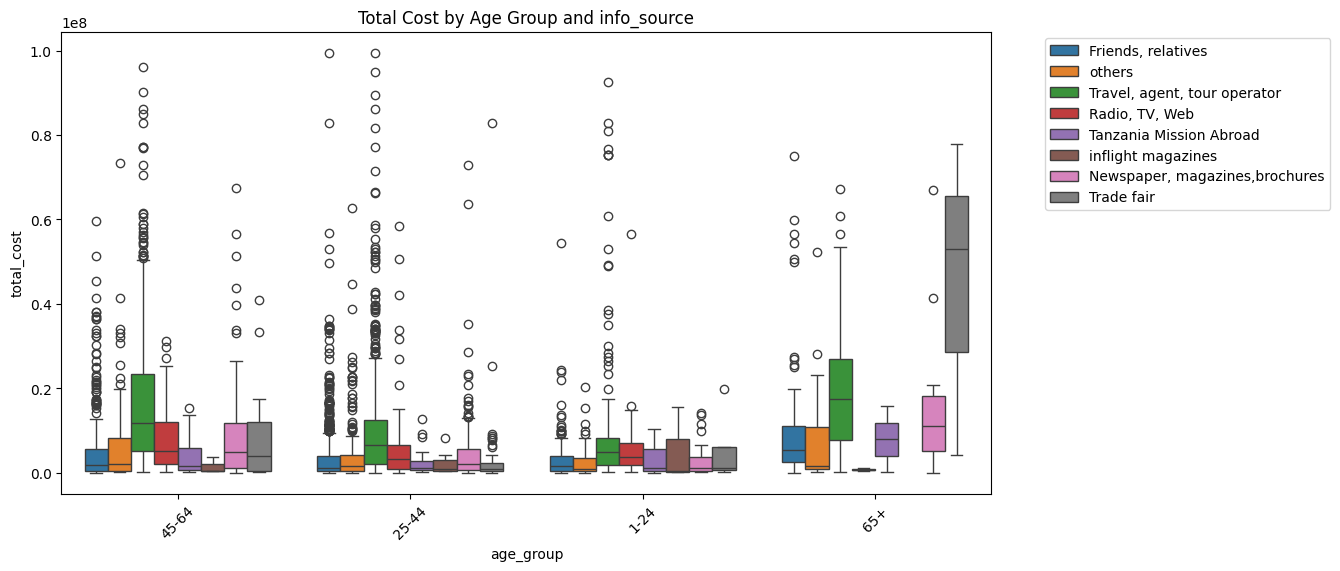

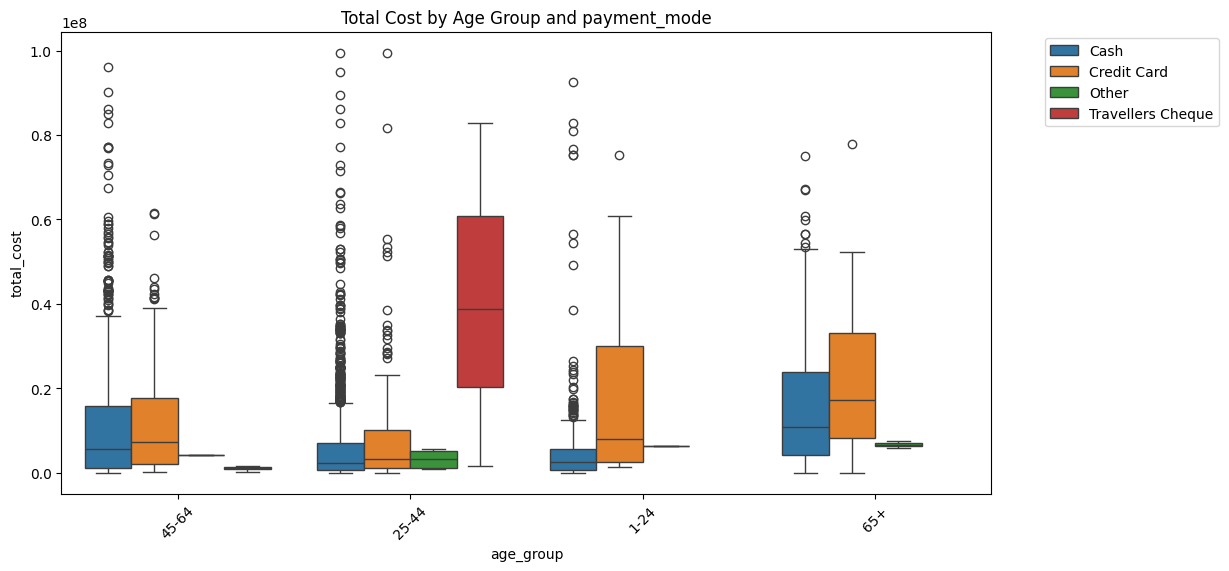

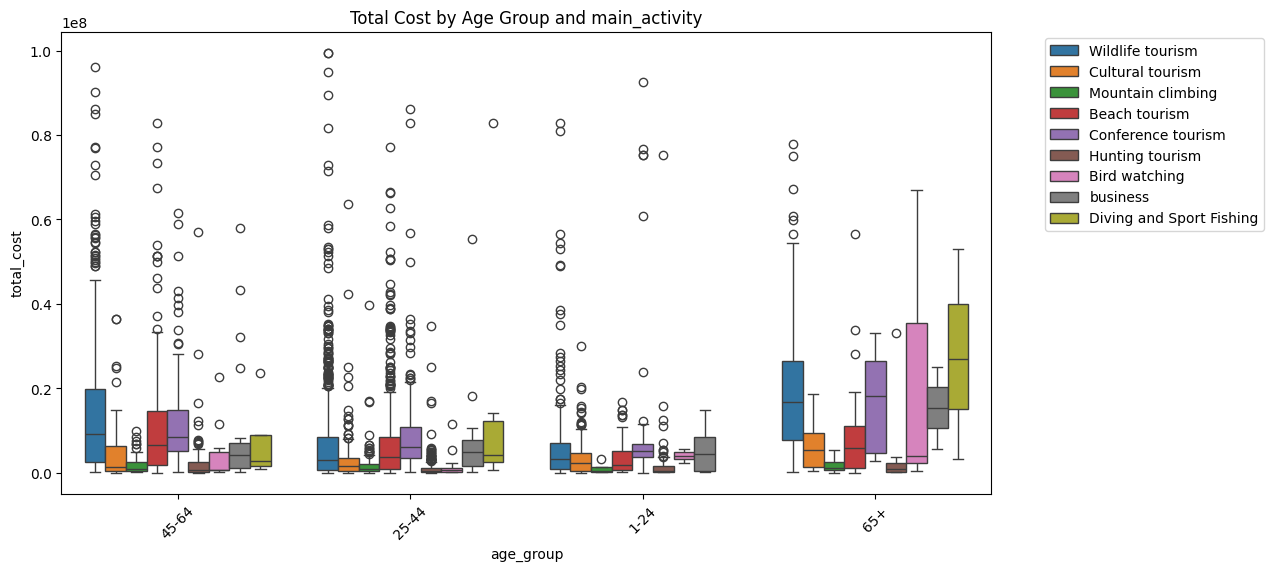

In [6]:
variables = ['travel_with', 'purpose', 'info_source', 'payment_mode', 'main_activity']

for var in variables:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='age_group', y='total_cost', hue=var)
    plt.xticks(rotation=45)
    plt.title(f"Total Cost by Age Group and {var}")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

  age_group        travel_with                  purpose
0     25-44  Friends/Relatives  Meetings and Conference
Ethiopian Mean Cost: 2574926.25
Overall Mean Cost: 8114388.777617799


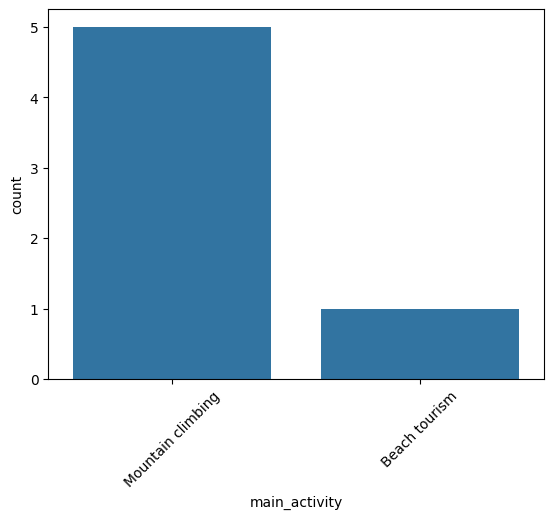

In [7]:
ethiopia_df = df[df['country'] == 'ETHIOPIA']  # Replace with actual country name if needed

# Common demographics
print(ethiopia_df[['age_group', 'travel_with', 'purpose']].mode())

# Spending comparison
print("Ethiopian Mean Cost:", ethiopia_df['total_cost'].mean())
print("Overall Mean Cost:", df['total_cost'].mean())

# Visualization
sns.countplot(data=ethiopia_df, x='main_activity')
plt.xticks(rotation=45)
plt.show()